In [2]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
#importing the dataset

california_housing=pd.read_csv('housing.csv')

In [22]:
data=california_housing.copy()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [119]:
# Fill the null values in total bedrooms column by random
Fill_total_bedrooms=data["total_bedrooms"].dropna().unique()
data['total_bedrooms'] = data['total_bedrooms'].fillna(pd.Series(np.random.choice(Fill_total_bedrooms,size=len(data.index))))

### Data Exploration

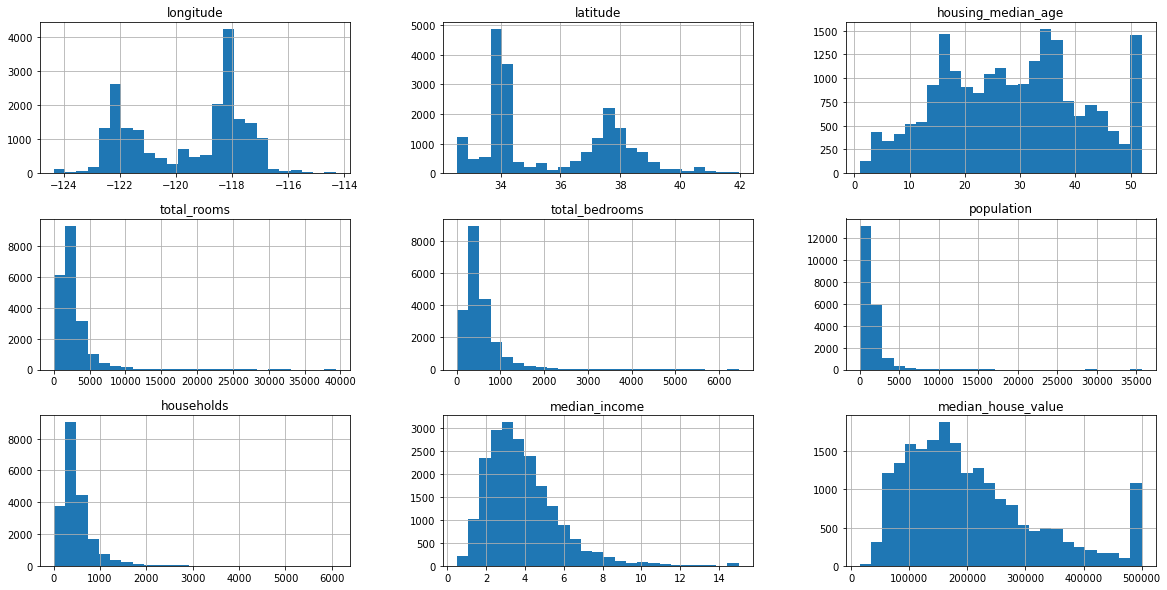

In [120]:
data.hist(bins=25,figsize=(20,10));

In [121]:
# Explore the column ocean_proximity
ocean_values = data["ocean_proximity"].value_counts()
ocean_values

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

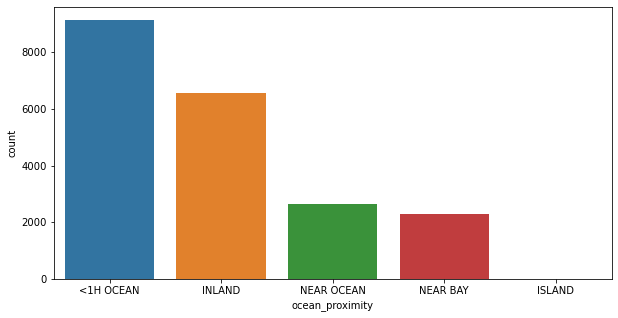

In [122]:
plt.figure(figsize=(10,5))
sns.countplot(x = "ocean_proximity",data=data,order=ocean_values.index)

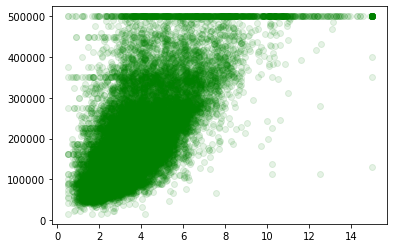

In [123]:
# check scatter plot between median_income and median_house_value
plt.scatter(data["median_income"],data["median_house_value"], alpha=0.1,color="g")

## Linear Regression

In [124]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [125]:
# Selecting the columns we will use to predict housing price
housing_data = data[['housing_median_age', 'total_rooms',
        'total_bedrooms','population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity',]]

In [126]:
housing_data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [127]:
# covert the column ocean_proximity to numeric by labelencoder
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
housing_data['ocean_proximity'] = l.fit_transform(housing_data['ocean_proximity'])

C:\Users\sushanta\AppData\Local\Temp\ipykernel_30392\1475007017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data['ocean_proximity'] = l.fit_transform(housing_data['ocean_proximity'])


In [128]:
housing_data['ocean_proximity']

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int32

In [129]:
# split the data to x and y
# y is 1 column contain the values is the target
# x contain the values of the rest of columns
x = housing_data.drop(["median_house_value"],axis=1).values
y= housing_data['median_house_value'].values

In [130]:
x

array([[4.1000e+01, 8.8000e+02, 1.2900e+02, ..., 1.2600e+02, 8.3252e+00,
        3.0000e+00],
       [2.1000e+01, 7.0990e+03, 1.1060e+03, ..., 1.1380e+03, 8.3014e+00,
        3.0000e+00],
       [5.2000e+01, 1.4670e+03, 1.9000e+02, ..., 1.7700e+02, 7.2574e+00,
        3.0000e+00],
       ...,
       [1.7000e+01, 2.2540e+03, 4.8500e+02, ..., 4.3300e+02, 1.7000e+00,
        1.0000e+00],
       [1.8000e+01, 1.8600e+03, 4.0900e+02, ..., 3.4900e+02, 1.8672e+00,
        1.0000e+00],
       [1.6000e+01, 2.7850e+03, 6.1600e+02, ..., 5.3000e+02, 2.3886e+00,
        1.0000e+00]])

In [131]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [132]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [133]:
# train-test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [134]:
x_train

array([[3.7000e+01, 1.7980e+03, 3.3100e+02, ..., 3.4000e+02, 4.2143e+00,
        0.0000e+00],
       [4.2000e+01, 2.5330e+03, 4.3300e+02, ..., 3.9800e+02, 5.3468e+00,
        0.0000e+00],
       [3.6000e+01, 1.9430e+03, 3.3700e+02, ..., 3.1800e+02, 3.9191e+00,
        0.0000e+00],
       ...,
       [3.6000e+01, 2.1010e+03, 5.6900e+02, ..., 5.2700e+02, 2.9344e+00,
        0.0000e+00],
       [1.5000e+01, 3.5750e+03, 5.9700e+02, ..., 5.5900e+02, 5.7192e+00,
        0.0000e+00],
       [5.2000e+01, 4.2260e+03, 1.3150e+03, ..., 1.2420e+03, 2.5755e+00,
        3.0000e+00]])

In [135]:
x_test

array([[2.5000e+01, 1.5050e+03, 4.1830e+03, ..., 3.5900e+02, 1.6812e+00,
        1.0000e+00],
       [3.0000e+01, 2.9430e+03, 3.9230e+03, ..., 5.8400e+02, 2.5313e+00,
        1.0000e+00],
       [5.2000e+01, 3.8300e+03, 1.0600e+03, ..., 9.6300e+02, 3.4801e+00,
        3.0000e+00],
       ...,
       [3.7000e+01, 1.5510e+03, 5.0100e+02, ..., 4.7400e+02, 2.1667e+00,
        0.0000e+00],
       [6.0000e+00, 6.8730e+03, 9.5900e+02, ..., 9.3100e+02, 6.8869e+00,
        1.0000e+00],
       [3.6000e+01, 2.3340e+03, 4.3000e+02, ..., 4.0700e+02, 6.6321e+00,
        0.0000e+00]])

In [136]:
y_test

array([ 47700.,  45800., 500001., ..., 117700., 263100., 481500.])

In [137]:
y_train

array([228500., 279900., 183000., ..., 222100., 283500., 325000.])

In [138]:
# Linear Regression Model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [139]:
reg.score(x_train,y_train)

0.5691668880562499

In [140]:
housing_data = housing_data.reset_index()

In [141]:
reg.score(x_test,y_test)

0.526143253156103

In [142]:
reg.intercept_

-50465.43694980492

In [143]:
reg.coef_

array([ 1.82915465e+03, -2.03131012e+01,  1.06898999e+02, -3.36871994e+01,
        1.17609602e+02,  4.78993436e+04,  4.05750195e+03])

In [146]:
y_pred_1 = reg.predict(x_test)

In [147]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [148]:
df_1.head()

,y_test,Y_pred
0,47700.0,491765.869523
1,45800.0,505261.170314
2,500001.0,328159.193161
3,218600.0,358352.235887
4,278000.0,385774.309003


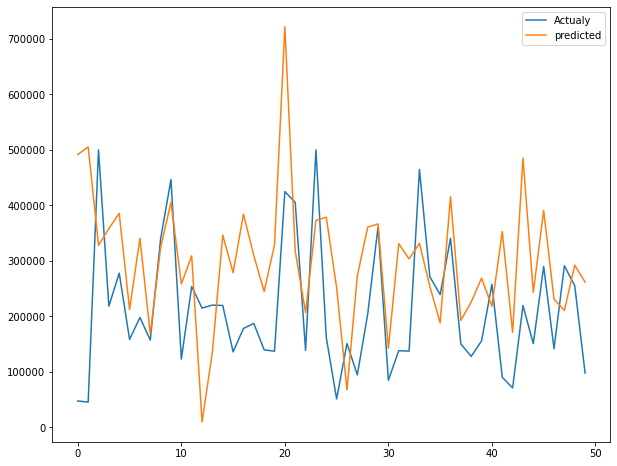

In [149]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actualy","predicted"]);
